In [1]:
import numpy as np 
import pandas as pd 
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

# FONTE: https://brasil.io/dataset/covid19/files/

In [2]:
# importing the data
caso_full = pd.read_csv('../covid_comba_datasets/caso_full.csv')

In [3]:
# creating datasets
df_caso_full = caso_full.loc[caso_full['state'] == 'RS']

### Detalhes Caso Full dataset

In [4]:
df_caso_full.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
1287191,Campo Bom,4303905.0,2020-03-10,202011,69458.0,66712.0,False,False,1,1.43972,2020-03-10,0.0,0,1,city,RS,1,0
1287192,NaN,43.0,2020-03-10,202011,11422973.0,11377239.0,False,False,1,0.00875,2020-03-10,0.0,0,1,state,RS,1,0
1287193,Campo Bom,4303905.0,2020-03-11,202011,69458.0,66712.0,False,False,1,1.43972,2020-03-11,0.0,0,2,city,RS,0,0
1287194,Porto Alegre,4314902.0,2020-03-11,202011,1488252.0,1483771.0,False,False,1,0.06719,2020-03-11,0.0,0,1,city,RS,1,0
1287195,NaN,43.0,2020-03-11,202011,11422973.0,11377239.0,False,False,2,0.01751,2020-03-11,0.0,0,2,state,RS,1,0


In [5]:
a = df_caso_full['is_repeated'].unique()
list(df_caso_full.columns)

['city',
 'city_ibge_code',
 'date',
 'epidemiological_week',
 'estimated_population',
 'estimated_population_2019',
 'is_last',
 'is_repeated',
 'last_available_confirmed',
 'last_available_confirmed_per_100k_inhabitants',
 'last_available_date',
 'last_available_death_rate',
 'last_available_deaths',
 'order_for_place',
 'place_type',
 'state',
 'new_confirmed',
 'new_deaths']

In [6]:
# remove os que são de place_type = state
df_caso_full_cities = df_caso_full.loc[df_caso_full['place_type'] == 'city']


In [7]:
df_caso_full_cities.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
1287191,Campo Bom,4303905.0,2020-03-10,202011,69458.0,66712.0,False,False,1,1.43972,2020-03-10,0.0,0,1,city,RS,1,0
1287193,Campo Bom,4303905.0,2020-03-11,202011,69458.0,66712.0,False,False,1,1.43972,2020-03-11,0.0,0,2,city,RS,0,0
1287194,Porto Alegre,4314902.0,2020-03-11,202011,1488252.0,1483771.0,False,False,1,0.06719,2020-03-11,0.0,0,1,city,RS,1,0
1287196,Campo Bom,4303905.0,2020-03-12,202011,69458.0,66712.0,False,False,1,1.43972,2020-03-12,0.0,0,3,city,RS,0,0
1287197,Caxias do Sul,4305108.0,2020-03-12,202011,517451.0,510906.0,False,False,1,0.19326,2020-03-12,0.0,0,1,city,RS,1,0


In [8]:
df_caso_full_cities.describe()

,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
count,1.549470e+05,155193.000000,1.549470e+05,1.549470e+05,155193.000000,154175.000000,155193.000000,155193.000000,155193.000000,155193.000000,155193.000000
mean,4.311888e+06,202056.707699,2.624748e+04,2.613702e+04,596.045936,2247.113006,0.024888,12.687151,158.955294,5.406623,0.125212
std,6.687854e+03,32.605902,8.923285e+04,8.885766e+04,2985.265071,2529.060569,0.058983,78.821436,94.204765,35.070833,1.080999
min,4.300034e+06,202011.000000,9.820000e+02,1.034000e+03,0.000000,0.067190,0.000000,0.000000,1.000000,-100.000000,-1.000000
25%,4.306106e+06,202033.000000,3.036000e+03,3.030000e+03,20.000000,370.233250,0.000000,0.000000,78.000000,0.000000,0.000000
50%,4.312104e+06,202044.000000,6.067000e+03,6.091000e+03,78.000000,1381.118880,0.012500,1.000000,156.000000,0.000000,0.000000
75%,4.317509e+06,202102.000000,1.922400e+04,1.929300e+04,272.000000,3281.519860,0.027000,5.000000,235.000000,2.000000,0.000000
max,4.323804e+06,202113.000000,1.488252e+06,1.483771e+06,115589.000000,23929.008570,1.000000,3522.000000,387.000000,4074.000000,145.000000


### Dados Localização IBGE

In [9]:
df_localizacao = pd.read_csv('./ibge_rs_data/municipios.csv')

In [10]:
df_localizacao = df_localizacao.loc[df_localizacao['codigo_uf'] == 43]
df_localizacao = df_localizacao.reset_index(drop=True)
df_localizacao

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf
0,4300034,Aceguá,-31.8665,-54.1615,0,43
1,4300059,Água Santa,-28.1672,-52.0310,0,43
2,4300109,Agudo,-29.6447,-53.2515,0,43
3,4300208,Ajuricaba,-28.2342,-53.7757,0,43
4,4300307,Alecrim,-27.6579,-54.7649,0,43
...,...,...,...,...,...,...
492,4323606,Vista Alegre do Prata,-28.8052,-51.7947,0,43
493,4323705,Vista Gaúcha,-27.2902,-53.6974,0,43
494,4323754,Vitória das Missões,-28.3516,-54.5040,0,43
495,4323770,Westfália,-29.4263,-51.7645,0,43


In [11]:
# drop colunas desnecessárias
df_localizacao = df_localizacao.drop(['capital', 'codigo_uf'], 1)
df_localizacao

,codigo_ibge,nome,latitude,longitude
0,4300034,Aceguá,-31.8665,-54.1615
1,4300059,Água Santa,-28.1672,-52.0310
2,4300109,Agudo,-29.6447,-53.2515
3,4300208,Ajuricaba,-28.2342,-53.7757
4,4300307,Alecrim,-27.6579,-54.7649
...,...,...,...,...
492,4323606,Vista Alegre do Prata,-28.8052,-51.7947
493,4323705,Vista Gaúcha,-27.2902,-53.6974
494,4323754,Vitória das Missões,-28.3516,-54.5040
495,4323770,Westfália,-29.4263,-51.7645


In [12]:
# renomeia coluna 
df_localizacao.rename({'codigo_ibge': 'city_ibge_code'}, axis=1, inplace=True)
df_localizacao.head()

,city_ibge_code,nome,latitude,longitude
0,4300034,Aceguá,-31.8665,-54.1615
1,4300059,Água Santa,-28.1672,-52.0310
2,4300109,Agudo,-29.6447,-53.2515
3,4300208,Ajuricaba,-28.2342,-53.7757
4,4300307,Alecrim,-27.6579,-54.7649


### Merge com df_caso_full_cities by city_ibge_code

In [13]:
df_full = pd.merge(df_caso_full_cities, df_localizacao, on="city_ibge_code")
df_full.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,...,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,nome,latitude,longitude
0,Campo Bom,4303905.0,2020-03-10,202011,69458.0,66712.0,False,False,1,1.43972,...,0.0,0,1,city,RS,1,0,Campo Bom,-29.6747,-51.0606
1,Campo Bom,4303905.0,2020-03-11,202011,69458.0,66712.0,False,False,1,1.43972,...,0.0,0,2,city,RS,0,0,Campo Bom,-29.6747,-51.0606
2,Campo Bom,4303905.0,2020-03-12,202011,69458.0,66712.0,False,False,1,1.43972,...,0.0,0,3,city,RS,0,0,Campo Bom,-29.6747,-51.0606
3,Campo Bom,4303905.0,2020-03-13,202011,69458.0,66712.0,False,False,1,1.43972,...,0.0,0,4,city,RS,0,0,Campo Bom,-29.6747,-51.0606
4,Campo Bom,4303905.0,2020-03-14,202011,69458.0,66712.0,False,True,1,1.43972,...,0.0,0,5,city,RS,0,0,Campo Bom,-29.6747,-51.0606


In [14]:
data = {'city': df_full['city'],
        'estimated_population': df_full['estimated_population']}
df_population = pd.DataFrame(data)
df_population = df_population.drop_duplicates()
df_population

,city,estimated_population
0,Campo Bom,69458.0
387,Porto Alegre,1488252.0
773,Caxias do Sul,517451.0
1158,Sapiranga,80037.0
1537,Alvorada,211352.0
...,...,...
154006,Garruchos,2886.0
154198,Novo Tiradentes,2200.0
154389,Pedras Altas,1954.0
154579,Estrela Velha,3650.0


In [15]:
deaths_by_city = df_full.groupby("city")["new_confirmed"].count()
count_coords = pd.DataFrame({'count': df_full.groupby("city")[ "new_confirmed"].size()}).reset_index()
count_coords = pd.merge(count_coords, df_population, on="city")
count_coords.rename({'city': 'nome'}, axis=1, inplace=True)
count_coords = pd.merge(count_coords, df_localizacao, on="nome")
count_coords = count_coords.drop('city_ibge_code', 1)
count_coords['deaths/pop'] = count_coords['count'].div(count_coords.estimated_population)
count_coords

,nome,count,estimated_population,latitude,longitude,deaths/pop
0,Aceguá,259,4942.0,-31.8665,-54.1615,0.052408
1,Agudo,307,16401.0,-29.6447,-53.2515,0.018718
2,Ajuricaba,353,6987.0,-28.2342,-53.7757,0.050522
3,Alecrim,318,5827.0,-27.6579,-54.7649,0.054574
4,Alegrete,365,73028.0,-29.7902,-55.7949,0.004998
...,...,...,...,...,...,...
492,Vitória das Missões,303,3092.0,-28.3516,-54.5040,0.097995
493,Westfália,332,3031.0,-29.4263,-51.7645,0.109535
494,Xangri-lá,338,16775.0,-29.8065,-50.0519,0.020149
495,Água Santa,328,3743.0,-28.1672,-52.0310,0.087630


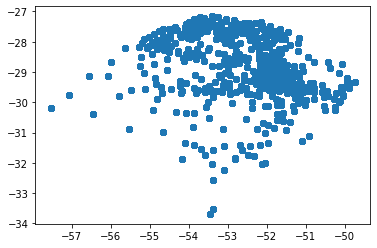

In [16]:
import matplotlib.pyplot as plt
plt.scatter(x=df_full['longitude'], y=df_full['latitude'])
plt.show()

In [17]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

df = count_coords

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

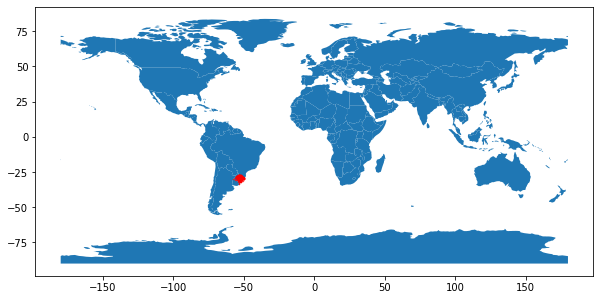

In [18]:
#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=0.1);

In [19]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import libpysal
# libpysal.examples.available()
# https://pysal.org/notebooks/lib/libpysal/Example_Datasets.html

In [20]:
# pth = libpysal.examples.get_path("Rio Grande do Sul.shp")
from libpysal.examples import explain
explain('Rio Grande do Sul')
# install RS
rs = libpysal.examples.load_example('Rio Grande do Sul')

Rio_Grande_do_Sul

Cities of the Brazilian State of Rio Grande do Sul
-------------------------------------------------------

* 43MUE250GC_SIR.dbf: attribute data (k=2)
* 43MUE250GC_SIR.shp: Polygon shapefile (n=499)
* 43MUE250GC_SIR.shx: spatial index
* 43MUE250GC_SIR.cpg: encoding file 
* 43MUE250GC_SIR.prj: projection information 
* map_RS_BR.dbf: attribute data (k=3)
* map_RS_BR.shp: Polygon shapefile (no lakes) (n=497)
* map_RS_BR.prj: projection information
* map_RS_BR.shx: spatial index



Source: Renan Xavier Cortes 
Reference: https://github.com/pysal/pysal/issues/889#issuecomment-396693495




In [21]:
#rs.get_file_list()

In [22]:
rs_counties_shp = rs.load('map_RS_BR.shp')
rs_df = gpd.read_file(rs.get_path('map_RS_BR.shp'))


In [23]:
# %matplotlib inline
# rs_df.plot()

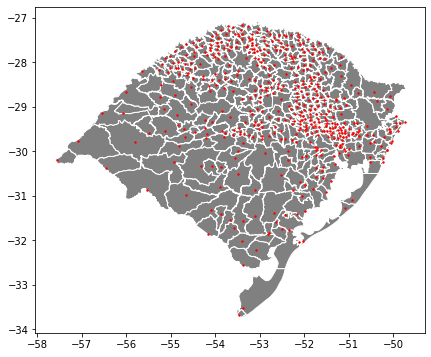

In [24]:
rs_map = gpd.read_file(rs.get_path('map_RS_BR.shp'))
gdf.plot(ax=rs_map.plot(figsize=(10, 6), edgecolor='white', facecolor='grey'), 
             marker='o', 
             color='red', 
             markersize=2,
        );
# ligar janelas (mortes entre 0-10 ex) de atributos
# explorar a distância, não só vizinhança
# apresentação: passos (acertos e erros)

In [25]:
# ax = gdf.plot(edgecolor='grey', facecolor='w')
# f,ax = w_rook.plot(gdf, ax=ax, 
#         edge_kws=dict(color='r', linestyle=':', linewidth=1),
#         node_kws=dict(marker=''))
# ax.set_axis_off()

In [26]:
# rs_map = gpd.read_file(rs.get_path('map_RS_BR.shp'))
# ax = gdf.plot(ax=rs_map.plot(figsize=(10, 6), edgecolor='grey', facecolor='w'))
# f, ax = gdf.plot(gdf, ax=ax, edge_kws=dict(color='r', linestyle=':', linewidth=1))
# ax.set_axis_off()

# Função para calcular distância entre duas cidades (em km)

In [27]:
import geopy.distance

def distance_fun(coord_1, coord_2):
    return geopy.distance.distance(coord_1, coord_2).km
# PESQUISAR DIFERENÇA ENTRE AS DISTÂNCIAS (DISTANCE.DISTANCE/DISTANCE.GEODESIC) -> resultado foi igual

In [28]:
# dir(g)
# g.adhesion()
# g.cohesion()
# g.cliques()
# g.clique_number()
# g.closeness()
# g.average_path_length()
# g.convergence_degree()
# g.degree()
# g.degree_distribution()
# g.get_diameter()
# g.girth()
# g.maxdegree()
# g.maximal_cliques()
# g.outdegree()
# g.indegree()
# g.radius()
# g.spanning_tree()
# g.strength()
# g.transitivity_avglocal_undirected()
# g.transitivity_local_undirected()
# g.transitivity_undirected()

# mode = 'zero' || 'nan'
# g.transitivity_undirected(mode='zero')
# g.transitivity_local_undirected(mode='zero')
# g.transitivity_avglocal_undirected(mode='zero')

# Função para salvar dados do gráfico para csv

In [29]:
def export_data(min_distance, death_rate, graph):
    vertices = graph.vcount()
    edges = graph.ecount()
    med_degree = graph.maxdegree()
    max_degree = graph.maxdegree()
#     cluster_coef = graph.transitivity() 
    clique_number = graph.clique_number()
    shortest_paths_dijkstra = graph.shortest_paths_dijkstra(mode=1)
    degree_distribution = graph.degree_distribution(bin_width=1)
    diameter_size = len(graph.get_diameter())
    dyad_census = graph.dyad_census()
    adjacency = graph.get_adjacency(type=2, attribute=None, default=0, eids=False)
#     Cohesive blocking only works on simple graphs, Invalid value
#     cohesive_blocks = graph.cohesive_blocks()

#     print(max(shortest_paths_dijkstra))
#             'density': [0],
    
    data = {'min_distance':  [min_distance],
            'death_rate': [death_rate],
            'diameter_size': [diameter_size],
            '# vertices': [vertices],
            '#edges': [edges], 
            'clique_number': [clique_number],
            'med_degree': [med_degree],
            'max_degree': [max_degree]
            # clique? corresponde de fato a uma região no resultado -> serra; number e ver os grupos
            }
    
    file_name = "./artifacts/min_distance_" + str(min_distance) + "_death_rate_" + str(death_rate)
    
    # SALVA DATASET 
    df = pd.DataFrame (data, columns = ['min_distance', 'density', 'clustering_weak', 'clustering_strong', 'diameter_size'])
    df.to_csv(file_name + ".csv", index = False)

    # SALVA PLOT DO GRAFO
    plot(graph, file_name + ".png")
    print (df)

# Função auxiliar para remover nodos sem vértices

In [30]:
def delete_loose_nodes(graph):
    plot(graph)
    graph.vs.select(_degree=0).delete()

# Função auxiliar pra configurar visualização do grafo

In [31]:
def adjust_graph(graph):
    visual_style = {}
    color_dict = {"m": "blue", "f": "pink"}
    layout = graph.layout_reingold_tilford(root=[2])

    visual_style["vertex_size"] = 20
#     visual_style["vertex_color"] = [color_dict[gender] for gender in g.vs["gender"]]
    visual_style["vertex_label"] = g.vs["name"]
#     visual_style["edge_width"] = [1 + 2 * int(is_formal) for is_formal in g.es["is_formal"]]
#     visual_style["layout"] = layout
    visual_style["bbox"] = (300, 300)
    visual_style["margin"] = 20
    plot(g, **visual_style)

In [38]:
# adjust_graph(g1)

# Aplicando iGraph

In [33]:
from igraph import *
import ast

names = count_coords.nome.unique().tolist()

# g = Graph(len(count_coords.index))
# g.vs["name"] = names

In [34]:
def create_edges(min_distance, death_rate):
    g = Graph(len(count_coords.index))
    g.vs["name"] = names
    
    for index_1, row_1 in count_coords.iterrows():
        city_1 = row_1['nome']
        coord_1 = (row_1['latitude'], row_1['longitude'])
        death_rate_1 = row_1['deaths/pop']
#         print(index_1)
        
        for index_2, row_2 in count_coords.iterrows():
            city_2 = row_2['nome']
            coord_2 = (row_2['latitude'], row_2['longitude'])
            death_rate_2 = row_2['deaths/pop']
            distance = distance_fun(coord_1, coord_2)

            if distance > 0 and distance < min_distance:
                if death_rate_1 > death_rate and death_rate_2 > death_rate:
                    if not g.are_connected(index_2, index_1):
                        g.add_edges([(index_1, index_2)])
    
    delete_loose_nodes(g)
    export_data(min_distance, death_rate, g)
    
    return g

In [35]:
g1 = create_edges(50, 0.05)
# g2 = create_edges(100, 0.05)
# g3 = create_edges(150, 0.05)
# g4 = create_edges(200, 0.05)
# g5 = create_edges(250, 0.05)

/home/bruna/anaconda3/lib/python3.7/site-packages/igraph/__init__.py:574: RuntimeWarning: Dyad census called on undirected graph at ../../../source/igraph/src/motifs.c:857
  return DyadCensus(GraphBase.dyad_census(self, *args, **kwds))


   min_distance density clustering_weak clustering_strong  diameter_size
0            50     NaN             NaN               NaN             17


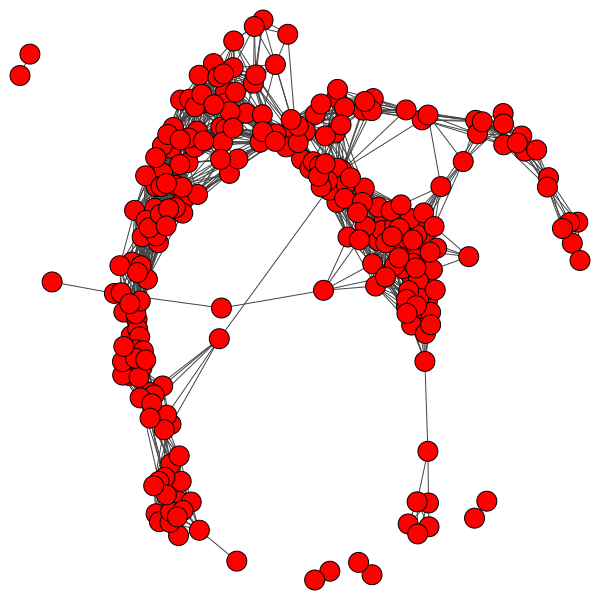

In [39]:
plot(g1)

In [36]:
# import numpy as np
# import random
# from matplotlib import pyplot as plt

# deaths_per_city = total_count['count'].tolist()
# print(max(deaths_per_city))

# bins = np.linspace(math.ceil(min(deaths_per_city)), 
#                    math.floor(max(deaths_per_city)),
#                    10) # fixed number of bins
# b = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375,400, 500, 1000]

# plt.xlim([min(deaths_per_city)-5, max(deaths_per_city)+10])

# plt.hist(deaths_per_city, bins=b, alpha=0.5, color = "skyblue", ec="black")
# plt.title('Number of cases (fixed number of bins)')
# plt.xlabel('number of cases')
# plt.ylabel('number of cities')

# plt.show()